# Ch05-2 Pandas DataFrame 時間序列

# Outline

1. Indexing Time Series
2. Resampling Time Series Data
3. Manipulating Time Series Data
4. Time Series Visualization


In [1051]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt



## if use google colab, then can use the following code to upload the file

# from google.colab import files
# uploaded = files.upload()

# import io 
# Titanics_data = pd.read_csv(io.BytesIO(uploaded['titanic.csv']))


In [1052]:
Titanic_data = pd.read_csv("./titanic.csv")

In [1053]:
Titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Indexing Time Series


Pandas stores data and that information in dataframe objects.
read_csv() function:
- Can read string into datatime objects
- Need to specify 'parse_dates = True'
  
ISO 8601 format: yyyy-mm-dd hh:mm:ss


In [1054]:
# Define the lists as shown in the image
Date = ['2019-08-01 08:00:00', '2019-08-15 12:00:00', '2019-08-30 20:00:00', 
        '2019-09-01 08:01:00', '2019-09-15 12:01:00', '2019-09-30 20:01:00', 
        '2019-10-01 08:02:00', '2019-10-15 12:02:00', '2019-10-30 20:02:00']

Company = ['Apple', 'Microsoft', 'Amazon', 
           'Apple', 'Microsoft', 'Amazon',
           'Apple', 'Microsoft', 'Amazon']

Product = ['iPhone', 'XBox', 'Mop', 
           'iPad', 'Surface', 'Decoration',
           'MacPro', 'Office365', 'Pen']

Units = ['1', '1', '2', 
         '2', '1', '1', 
         '1', '6', '10']

## 整併數據 -> dataframe

In [1055]:
data = {'Date': Date, 'Company': Company, 'Product': Product, 'Units': Units}
df_sales = pd.DataFrame(data)
print(df_sales)

                  Date    Company     Product Units
0  2019-08-01 08:00:00      Apple      iPhone     1
1  2019-08-15 12:00:00  Microsoft        XBox     1
2  2019-08-30 20:00:00     Amazon         Mop     2
3  2019-09-01 08:01:00      Apple        iPad     2
4  2019-09-15 12:01:00  Microsoft     Surface     1
5  2019-09-30 20:01:00     Amazon  Decoration     1
6  2019-10-01 08:02:00      Apple      MacPro     1
7  2019-10-15 12:02:00  Microsoft   Office365     6
8  2019-10-30 20:02:00     Amazon         Pen    10


In [1056]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     9 non-null      object
 1   Company  9 non-null      object
 2   Product  9 non-null      object
 3   Units    9 non-null      object
dtypes: object(4)
memory usage: 420.0+ bytes


## data column is not in datetime format, so we need to convert it to datetime format

In [1057]:
# Convert the 'Date' column from string to datetime
df_sales['Date'] = pd.to_datetime(df_sales['Date'])

print(df_sales)




                 Date    Company     Product Units
0 2019-08-01 08:00:00      Apple      iPhone     1
1 2019-08-15 12:00:00  Microsoft        XBox     1
2 2019-08-30 20:00:00     Amazon         Mop     2
3 2019-09-01 08:01:00      Apple        iPad     2
4 2019-09-15 12:01:00  Microsoft     Surface     1
5 2019-09-30 20:01:00     Amazon  Decoration     1
6 2019-10-01 08:02:00      Apple      MacPro     1
7 2019-10-15 12:02:00  Microsoft   Office365     6
8 2019-10-30 20:02:00     Amazon         Pen    10


In [1058]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     9 non-null      datetime64[ns]
 1   Company  9 non-null      object        
 2   Product  9 non-null      object        
 3   Units    9 non-null      object        
dtypes: datetime64[ns](1), object(3)
memory usage: 420.0+ bytes


## data column is not index, convert date to index

In [1059]:
df_sales.set_index('Date', inplace=True)


In [1060]:
df_sales

,Company,Product,Units
Date,,,
2019-08-01 08:00:00,Apple,iPhone,1
2019-08-15 12:00:00,Microsoft,XBox,1
2019-08-30 20:00:00,Amazon,Mop,2
2019-09-01 08:01:00,Apple,iPad,2
2019-09-15 12:01:00,Microsoft,Surface,1
2019-09-30 20:01:00,Amazon,Decoration,1
2019-10-01 08:02:00,Apple,MacPro,1
2019-10-15 12:02:00,Microsoft,Office365,6
2019-10-30 20:02:00,Amazon,Pen,10


In [1061]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9 entries, 2019-08-01 08:00:00 to 2019-10-30 20:02:00
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Company  9 non-null      object
 1   Product  9 non-null      object
 2   Units    9 non-null      object
dtypes: object(3)
memory usage: 288.0+ bytes


In [1062]:
# selecting single datetime
# the .loc method can be used to select data by row and column

df_sales.loc['2019-08-01 08:00:00', 'Company']

'Apple'

In [1063]:
df_sales.loc['2019-08-01 08:00:00']

Company     Apple
Product    iPhone
Units           1
Name: 2019-08-01 08:00:00, dtype: object

### partial string and Pandas supports a number of different ways to select data based on partial string indexing.

In [1064]:
df_sales.loc['2019-08']

,Company,Product,Units
Date,,,
2019-08-01 08:00:00,Apple,iPhone,1
2019-08-15 12:00:00,Microsoft,XBox,1
2019-08-30 20:00:00,Amazon,Mop,2


In [1065]:
# Here, we are going to give you more alternative ways to do that...

df_sales.loc['October, 2019']

,Company,Product,Units
Date,,,
2019-10-01 08:02:00,Apple,MacPro,1
2019-10-15 12:02:00,Microsoft,Office365,6
2019-10-30 20:02:00,Amazon,Pen,10


In [1066]:
df_sales.loc['2019-Oct-1']


,Company,Product,Units
Date,,,
2019-10-01 08:02:00,Apple,MacPro,1


In [1067]:
df_sales.loc['2019']

,Company,Product,Units
Date,,,
2019-08-01 08:00:00,Apple,iPhone,1
2019-08-15 12:00:00,Microsoft,XBox,1
2019-08-30 20:00:00,Amazon,Mop,2
2019-09-01 08:01:00,Apple,iPad,2
2019-09-15 12:01:00,Microsoft,Surface,1
2019-09-30 20:01:00,Amazon,Decoration,1
2019-10-01 08:02:00,Apple,MacPro,1
2019-10-15 12:02:00,Microsoft,Office365,6
2019-10-30 20:02:00,Amazon,Pen,10


In [1068]:
# slicing using dates/times
df_sales.loc['2019-09':'2019-10']

,Company,Product,Units
Date,,,
2019-09-01 08:01:00,Apple,iPad,2
2019-09-15 12:01:00,Microsoft,Surface,1
2019-09-30 20:01:00,Amazon,Decoration,1
2019-10-01 08:02:00,Apple,MacPro,1
2019-10-15 12:02:00,Microsoft,Office365,6
2019-10-30 20:02:00,Amazon,Pen,10


## we sometimes need to reindex a Series or Dataframe.
Reindeing involves provide a new index and the data will be realigned to the new index.

In [1069]:
time = pd.to_datetime(['2019-09-01 08:01:00','2019-09-06 12:01:00','2019-09-10 12:01:00','2019-09-15 12:01:00'])

df_sales.reindex(time)

,Company,Product,Units
2019-09-01 08:01:00,Apple,iPad,2
2019-09-06 12:01:00,NaN,NaN,NaN
2019-09-10 12:01:00,NaN,NaN,NaN
2019-09-15 12:01:00,Microsoft,Surface,1


### Here, the reindex method returns a new Dataframe with the four rows corresponding to times in time

In [1070]:
## when using reindex with missing entries, we can override the default behavior of filling with Nan.

## Forward fill

df_sales.reindex(time, method='ffill')

,Company,Product,Units
2019-09-01 08:01:00,Apple,iPad,2
2019-09-06 12:01:00,Apple,iPad,2
2019-09-10 12:01:00,Apple,iPad,2
2019-09-15 12:01:00,Microsoft,Surface,1


In [1071]:
## Backward fill

df_sales.reindex(time, method='bfill')

,Company,Product,Units
2019-09-01 08:01:00,Apple,iPad,2
2019-09-06 12:01:00,Microsoft,Surface,1
2019-09-10 12:01:00,Microsoft,Surface,1
2019-09-15 12:01:00,Microsoft,Surface,1


# Resampling Time Series Data

In [1072]:
# Define the lists as shown in the image
Date = ['2019-08-01 08:00:00', '2019-08-15 12:00:00', '2019-08-30 20:00:00', 
        '2019-09-01 08:01:00', '2019-09-15 12:01:00', '2019-09-30 20:01:00', 
        '2019-10-01 08:02:00', '2019-10-15 12:02:00', '2019-10-30 20:02:00']

Company = ['Apple', 'Microsoft', 'Amazon', 
           'Apple', 'Microsoft', 'Amazon',
           'Apple', 'Microsoft', 'Amazon']

Product = ['iPhone', 'XBox', 'Mop', 
           'iPad', 'Surface', 'Decoration',
           'MacPro', 'Office365', 'Pen']

Units = ['1', '1', '2', 
         '2', '1', '1', 
         '1', '6', '10']

df_sales = pd.DataFrame({'Date': Date, 'Company': Company, 'Product': Product, 'Units': Units})

# Converting 'Date' to datetime
df_sales['Date'] = pd.to_datetime(df_sales['Date'])

# Setting 'Date' as the index
df_sales.set_index('Date', inplace=True)

# Converting 'Units' to numeric
df_sales['Units'] = pd.to_numeric(df_sales['Units'])


df_sales



,Company,Product,Units
Date,,,
2019-08-01 08:00:00,Apple,iPhone,1
2019-08-15 12:00:00,Microsoft,XBox,1
2019-08-30 20:00:00,Amazon,Mop,2
2019-09-01 08:01:00,Apple,iPad,2
2019-09-15 12:01:00,Microsoft,Surface,1
2019-09-30 20:01:00,Amazon,Decoration,1
2019-10-01 08:02:00,Apple,MacPro,1
2019-10-15 12:02:00,Microsoft,Office365,6
2019-10-30 20:02:00,Amazon,Pen,10


In [1073]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9 entries, 2019-08-01 08:00:00 to 2019-10-30 20:02:00
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Company  9 non-null      object
 1   Product  9 non-null      object
 2   Units    9 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 288.0+ bytes


# Resampling

- Resampling methods over different time intervals: mean(), sum(), count(), etc.
- Downsampling: reduce datetime rows to slower frequency, i.e. daily to weekly, hourly to daily, etc.
- Upsampling: increase datetime rows to faster frequency, i.e. daily to hourly, etc.

In [1074]:
# Aggregating means

daily_mean = df_sales[['Units']].resample('D').mean()
daily_mean

,Units
Date,
2019-08-01,1.0
2019-08-02,NaN
2019-08-03,NaN
2019-08-04,NaN
2019-08-05,NaN
...,...
2019-10-26,NaN
2019-10-27,NaN
2019-10-28,NaN


In [1075]:
# Aggregating means

daily_mean = df_sales[['Units']].resample('M').mean()
daily_mean

,Units
Date,
2019-08-31,1.333333
2019-09-30,1.333333
2019-10-31,5.666667


## Verifying the results

In [1076]:
daily_mean.loc["2019-10-31"]

Units    5.666667
Name: 2019-10-31 00:00:00, dtype: float64

In [1077]:
df_sales.loc["2019-10", 'Units']

Date
2019-10-01 08:02:00     1
2019-10-15 12:02:00     6
2019-10-30 20:02:00    10
Name: Units, dtype: int64

In [1078]:
daily_sum = df_sales[['Units']].resample('M').sum()
daily_sum

,Units
Date,
2019-08-31,4
2019-09-30,4
2019-10-31,17


In [1079]:
df_sales[['Units']].resample('M').sum().max()

Units    17
dtype: int64

In [1080]:
df_sales.resample('W').count()

,Company,Product,Units
Date,,,
2019-08-04,1,1,1
2019-08-11,0,0,0
2019-08-18,1,1,1
2019-08-25,0,0,0
2019-09-01,2,2,2
2019-09-08,0,0,0
2019-09-15,1,1,1
2019-09-22,0,0,0
2019-09-29,0,0,0


## we also have 'T' for minutes, 'H' for hours, 'D' for days, 'W' for weeks, 'M' for months, 'Q' for quarters, and 'A' for years.

In [1081]:
# Multiploying frequencies
df_sales.loc[:,'Units'].resample('2W').sum()

Date
2019-08-04     1
2019-08-18     1
2019-09-01     4
2019-09-15     1
2019-09-29     0
2019-10-13     2
2019-10-27     6
2019-11-10    10
Freq: 2W-SUN, Name: Units, dtype: int64

In [1082]:
# Unsampling and filling
one_day = df_sales.loc['2019-10-01':'2019-10-30', 'Units']
one_day

Date
2019-10-01 08:02:00     1
2019-10-15 12:02:00     6
2019-10-30 20:02:00    10
Name: Units, dtype: int64

In [1083]:
one_day.resample('4H').bfill()

Date
2019-10-01 08:00:00     1
2019-10-01 12:00:00     6
2019-10-01 16:00:00     6
2019-10-01 20:00:00     6
2019-10-02 00:00:00     6
                       ..
2019-10-30 04:00:00    10
2019-10-30 08:00:00    10
2019-10-30 12:00:00    10
2019-10-30 16:00:00    10
2019-10-30 20:00:00    10
Freq: 4h, Name: Units, Length: 178, dtype: int64

In [1084]:
# df = pd.DataFrame(dict(A=[1, 1, 3], B=[None, 5, 6], C=[1, 2, 3],
#                      D=['3/11/2000', '3/12/2000', '3/13/2000']))

# df['D'] = pd.to_datetime(df['D'])

# print(df)
# df.groupby("A").last()

one_day.resample('4H').first().interpolate('linear')

Date
2019-10-01 08:00:00     1.000000
2019-10-01 12:00:00     1.058824
2019-10-01 16:00:00     1.117647
2019-10-01 20:00:00     1.176471
2019-10-02 00:00:00     1.235294
                         ...    
2019-10-30 04:00:00     9.826087
2019-10-30 08:00:00     9.869565
2019-10-30 12:00:00     9.913043
2019-10-30 16:00:00     9.956522
2019-10-30 20:00:00    10.000000
Freq: 4h, Name: Units, Length: 178, dtype: float64

# Manipulating time series data



In [1085]:
# Define the lists as shown in the image
Date = ['2019-08-01 08:00:00', '2019-08-15 12:00:00', '2019-08-30 20:00:00', 
        '2019-09-01 08:01:00', '2019-09-15 12:01:00', '2019-09-30 20:01:00', 
        '2019-10-01 08:02:00', '2019-10-15 12:02:00', '2019-10-30 20:02:00']

Company = ['Apple', 'Microsoft', 'Amazon', 
           'Apple', 'Microsoft', 'Amazon',
           'Apple', 'Microsoft', 'Amazon']

Product = ['iPhone', 'XBox', 'Mop', 
           'iPad', 'Surface', 'Decoration',
           'MacPro', 'Office365', 'Pen']

Units = ['1', '1', '2', 
         '2', '1', '1', 
         '1', '6', '10']

df_sales = pd.DataFrame({'Date': Date, 'Company': Company, 'Product': Product, 'Units': Units})

# Converting 'Date' to datetime
df_sales['Date'] = pd.to_datetime(df_sales['Date'])

# Setting 'Date' as the index
# df_sales.set_index('Date', inplace=True)

# Converting 'Units' to numeric
df_sales['Units'] = pd.to_numeric(df_sales['Units'])


df_sales



,Date,Company,Product,Units
0,2019-08-01 08:00:00,Apple,iPhone,1
1,2019-08-15 12:00:00,Microsoft,XBox,1
2,2019-08-30 20:00:00,Amazon,Mop,2
3,2019-09-01 08:01:00,Apple,iPad,2
4,2019-09-15 12:01:00,Microsoft,Surface,1
5,2019-09-30 20:01:00,Amazon,Decoration,1
6,2019-10-01 08:02:00,Apple,MacPro,1
7,2019-10-15 12:02:00,Microsoft,Office365,6
8,2019-10-30 20:02:00,Amazon,Pen,10


## datetime format 

%Y: 年份（四位數）
%m: 月份（01-12）
%d: 日期（01-31）
%H: 小時（00-23）
%M: 分鐘（00-59）
%S: 秒（00-59）

In [1086]:
df_sales['Formatted Date'] = df_sales['Date'].dt.strftime('%Y-%m-%d'); df_sales


,Date,Company,Product,Units,Formatted Date
0,2019-08-01 08:00:00,Apple,iPhone,1,2019-08-01
1,2019-08-15 12:00:00,Microsoft,XBox,1,2019-08-15
2,2019-08-30 20:00:00,Amazon,Mop,2,2019-08-30
3,2019-09-01 08:01:00,Apple,iPad,2,2019-09-01
4,2019-09-15 12:01:00,Microsoft,Surface,1,2019-09-15
5,2019-09-30 20:01:00,Amazon,Decoration,1,2019-09-30
6,2019-10-01 08:02:00,Apple,MacPro,1,2019-10-01
7,2019-10-15 12:02:00,Microsoft,Office365,6,2019-10-15
8,2019-10-30 20:02:00,Amazon,Pen,10,2019-10-30


### .str methods

In [1087]:
# String methods
df_sales['Company'].str.upper()

0        APPLE
1    MICROSOFT
2       AMAZON
3        APPLE
4    MICROSOFT
5       AMAZON
6        APPLE
7    MICROSOFT
8       AMAZON
Name: Company, dtype: object

In [1088]:
# String methods
df_sales['Product'].str.contains('i')

0     True
1    False
2    False
3     True
4    False
5     True
6    False
7     True
8    False
Name: Product, dtype: bool

In [1089]:
df_sales[df_sales['Product'].str.contains('i')]

,Date,Company,Product,Units,Formatted Date
0,2019-08-01 08:00:00,Apple,iPhone,1,2019-08-01
3,2019-09-01 08:01:00,Apple,iPad,2,2019-09-01
5,2019-09-30 20:01:00,Amazon,Decoration,1,2019-09-30
7,2019-10-15 12:02:00,Microsoft,Office365,6,2019-10-15


In [1090]:
# Boolean reduction
# This command inform us that there were 4 rows where .str.contains('i') was True

df_sales['Product'].str.contains('i').sum()

4

## Datetime methods

In [1091]:
df_sales

,Date,Company,Product,Units,Formatted Date
0,2019-08-01 08:00:00,Apple,iPhone,1,2019-08-01
1,2019-08-15 12:00:00,Microsoft,XBox,1,2019-08-15
2,2019-08-30 20:00:00,Amazon,Mop,2,2019-08-30
3,2019-09-01 08:01:00,Apple,iPad,2,2019-09-01
4,2019-09-15 12:01:00,Microsoft,Surface,1,2019-09-15
5,2019-09-30 20:01:00,Amazon,Decoration,1,2019-09-30
6,2019-10-01 08:02:00,Apple,MacPro,1,2019-10-01
7,2019-10-15 12:02:00,Microsoft,Office365,6,2019-10-15
8,2019-10-30 20:02:00,Amazon,Pen,10,2019-10-30


In [1092]:
df_sales['Date'].dt.hour
## this returns a new integer series where 0 is midnight and 23 is pm

0     8
1    12
2    20
3     8
4    12
5    20
6     8
7    12
8    20
Name: Date, dtype: int32

In [1093]:
df_sales['Date'].dt.tz_localize('UTC')

0   2019-08-01 08:00:00+00:00
1   2019-08-15 12:00:00+00:00
2   2019-08-30 20:00:00+00:00
3   2019-09-01 08:01:00+00:00
4   2019-09-15 12:01:00+00:00
5   2019-09-30 20:01:00+00:00
6   2019-10-01 08:02:00+00:00
7   2019-10-15 12:02:00+00:00
8   2019-10-30 20:02:00+00:00
Name: Date, dtype: datetime64[ns, UTC]

In [1094]:
df_sales['Date'].dt.tz_localize('US/Eastern')

0   2019-08-01 08:00:00-04:00
1   2019-08-15 12:00:00-04:00
2   2019-08-30 20:00:00-04:00
3   2019-09-01 08:01:00-04:00
4   2019-09-15 12:01:00-04:00
5   2019-09-30 20:01:00-04:00
6   2019-10-01 08:02:00-04:00
7   2019-10-15 12:02:00-04:00
8   2019-10-30 20:02:00-04:00
Name: Date, dtype: datetime64[ns, US/Eastern]

In [1095]:
df_sales['Date'].dt.tz_localize('US/Eastern').dt.tz_convert('Europe/Berlin')

0   2019-08-01 14:00:00+02:00
1   2019-08-15 18:00:00+02:00
2   2019-08-31 02:00:00+02:00
3   2019-09-01 14:01:00+02:00
4   2019-09-15 18:01:00+02:00
5   2019-10-01 02:01:00+02:00
6   2019-10-01 14:02:00+02:00
7   2019-10-15 18:02:00+02:00
8   2019-10-31 01:02:00+01:00
Name: Date, dtype: datetime64[ns, Europe/Berlin]

# Time series visualization


In [1096]:
# Define the lists as shown in the image
Date = ['2019-08-01 08:00:00', '2019-08-15 12:00:00', '2019-08-30 20:00:00', 
        '2019-09-01 08:01:00', '2019-09-15 12:01:00', '2019-09-30 20:01:00', 
        '2019-10-01 08:02:00', '2019-10-15 12:02:00', '2019-10-30 20:02:00']

Company = ['Apple', 'Microsoft', 'Amazon', 
           'Apple', 'Microsoft', 'Amazon',
           'Apple', 'Microsoft', 'Amazon']

Product = ['iPhone', 'XBox', 'Mop', 
           'iPad', 'Surface', 'Decoration',
           'MacPro', 'Office365', 'Pen']

Units = ['1', '1', '2', 
         '2', '1', '1', 
         '1', '6', '10']

df_sales = pd.DataFrame({'Date': Date, 'Company': Company, 'Product': Product, 'Units': Units})

# Converting 'Date' to datetime
df_sales['Date'] = pd.to_datetime(df_sales['Date'])

# Setting 'Date' as the index
df_sales.set_index('Date', inplace=True)

# Converting 'Units' to numeric
df_sales['Units'] = pd.to_numeric(df_sales['Units'])


df_sales




,Company,Product,Units
Date,,,
2019-08-01 08:00:00,Apple,iPhone,1
2019-08-15 12:00:00,Microsoft,XBox,1
2019-08-30 20:00:00,Amazon,Mop,2
2019-09-01 08:01:00,Apple,iPad,2
2019-09-15 12:01:00,Microsoft,Surface,1
2019-09-30 20:01:00,Amazon,Decoration,1
2019-10-01 08:02:00,Apple,MacPro,1
2019-10-15 12:02:00,Microsoft,Office365,6
2019-10-30 20:02:00,Amazon,Pen,10


<Axes: xlabel='Date'>

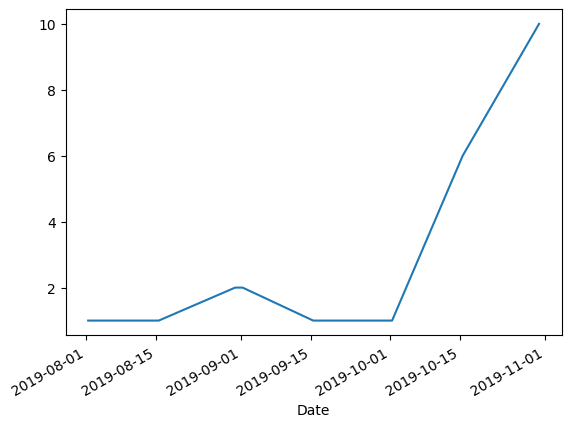

In [1097]:
# pandas plot
df_sales['Units'].plot()

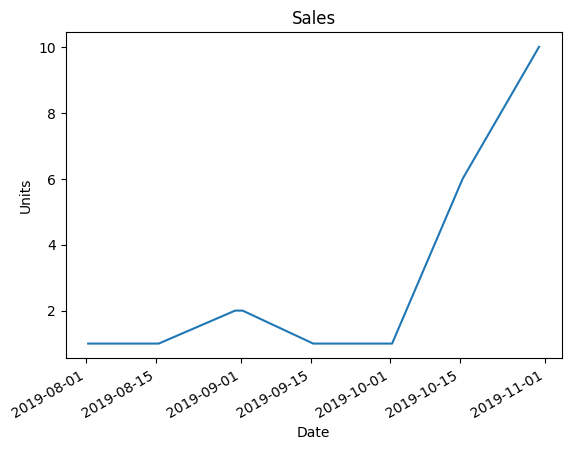

In [1098]:
# labels and Title

df_sales['Units'].plot(title='Sales')
plt.ylabel('Units')
plt.show()

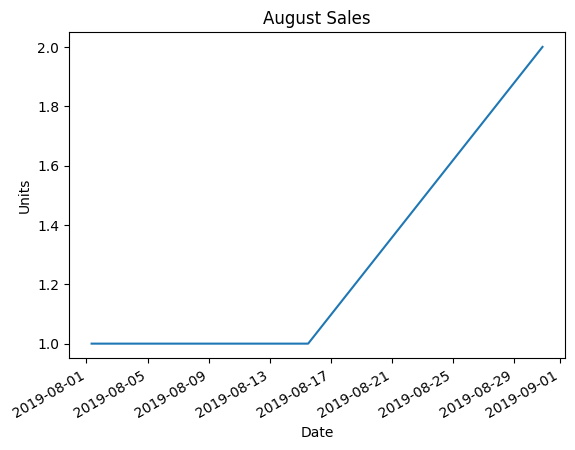

In [1099]:
# One Month 
df_sales.loc['2019-08-01': '2019-08-31','Units'].plot(title='August Sales')
plt.ylabel('Units')
plt.show()


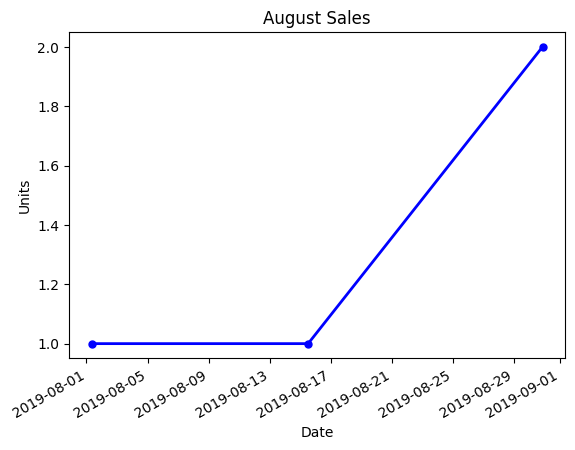

In [1100]:
# plot style
df_sales.loc['2019-08-01': '2019-08-31','Units'].plot(title='August Sales', style='b.-', linewidth=2, markersize=10)
plt.ylabel('Units')
plt.show()  

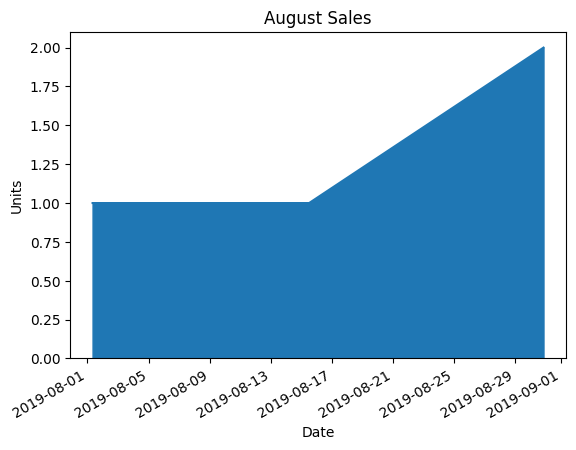

In [1101]:
# plot style
df_sales.loc['2019-08-01': '2019-08-31','Units'].plot(title='August Sales', kind="area")
plt.ylabel('Units')
plt.show()  

In [1102]:
price = [999,300,10,1399,1299,99,2999,199,20]
df_sales['price$'] = price
df_sales

,Company,Product,Units,price$
Date,,,,
2019-08-01 08:00:00,Apple,iPhone,1,999
2019-08-15 12:00:00,Microsoft,XBox,1,300
2019-08-30 20:00:00,Amazon,Mop,2,10
2019-09-01 08:01:00,Apple,iPad,2,1399
2019-09-15 12:01:00,Microsoft,Surface,1,1299
2019-09-30 20:01:00,Amazon,Decoration,1,99
2019-10-01 08:02:00,Apple,MacPro,1,2999
2019-10-15 12:02:00,Microsoft,Office365,6,199
2019-10-30 20:02:00,Amazon,Pen,10,20


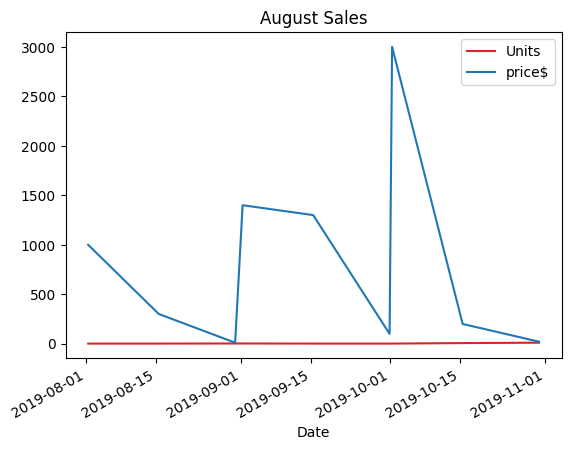

In [1103]:
# Multiple columns

df_sales.loc['2019', ['Units', 'price$']].plot(title='August Sales', color=['tab:red', 'tab:blue'])
plt.show()

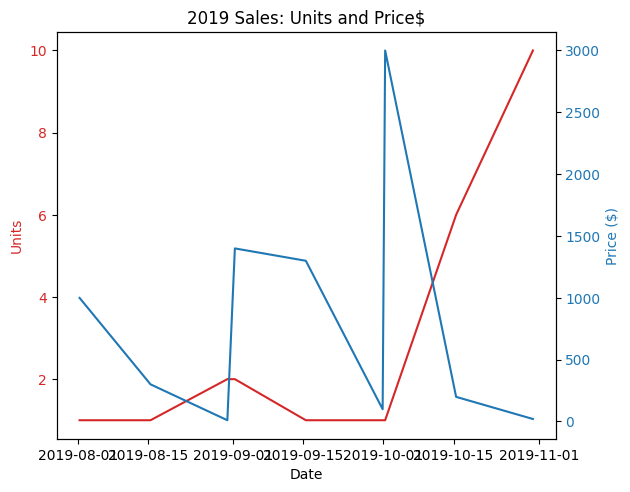

In [1104]:

# Selecting data from 2019 with 'Units' and 'price$' columns
data_2019 = df_sales.loc['2019', ['Units', 'price$']]

# Plotting with a twin y-axis
fig, ax1 = plt.subplots()

# First y-axis for 'Units'
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Units', color=color)
ax1.plot(data_2019.index, data_2019['Units'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Second y-axis for 'price$'
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Price ($)', color=color)  # we already handled the x-label with ax1
ax2.plot(data_2019.index, data_2019['price$'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Title
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('2019 Sales: Units and Price$')
plt.show()

## 整合應用 (一些工作會用到的小技巧)

以消費案例數據為例，學會以下技術

1. 整併大表 (表關聯應用)
2. 日期轉換
3. 財報相關指標彙總計算 

### 同比 & 環比

-1. **同比指得是與上一年同期相比的增長率和變化** <br>

● 年增率（YoY , Year on Year）= 年營收增長率 =（當年營收 - 去年營收）÷ 去年營收 x 100%

-2. **環比指的是與上一個月或上一個季度相比的增長率變化**<br>

● 季增率（QoQ , Quarter on Quarter）= 季營收增長率 =（當季營收 - 上季營收）÷ 上季營收 x 100%

● 月增率（MoM , Month on Month）= 月營收增長率 =（當月營收 - 上月營收）÷ 上月營收 x 100%

### 相對日期分析
● MTD（月至今）指的是從當月初至今天之前的期間，但不包括今天，因為今天可能還未結束。MTD用於提供特定時間段內的活動、運動結果等信息。例如，如果今天是7月20日，MTD則涵蓋7月1日至7月19日的數據。

● QTD（季至今）的含義與MTD相似，不同之處在於它指的是從當季初至今的時間段。需要注意的是，這可能指的是日曆季度或會計季度。

● YTD（年至今）則是從當年初至今的時間段，同樣不包括今天。在使用時，需確定是依照日曆年還是會計年度，因為會計年度可能不是從1月1日開始的。


## 其餘財報相關指標 (參考)
- EPS（Earnings Per Share）：每股盈餘，指公司的淨利潤除以在外流通的股份總數。
- ROE（Return on Equity）：股東權益回報率，衡量公司利用股東資本的效率。
- ROA（Return on Assets）：資產回報率，顯示公司利用其資產的效率。
- P/E（Price to Earnings Ratio）：本益比，用於衡量股票的價格與每股收益的比例。
- PEG（Price/Earnings to Growth Ratio）：本益成長比率，用於衡量股票價格相對於其盈利增長的合理性。
- EBITDA（Earnings Before Interest, Taxes, Depreciation, and Amortization）：息稅折舊及攤銷前利潤，用於衡量公司的經營效率和盈利能力。
- Net Income：淨收入，公司扣除一切費用後的最終利潤。
- Revenue或 Sales：營業收入，公司在一定時期內賺取的收入總額。
- Gross Margin：毛利率，銷售收入扣除銷售成本後的餘額比率。
- Operating Margin：營業利潤率，表示營業利潤占營業收入的比率。

In [1105]:
# 每日訂單數據

import pandas as pd
from pandas.tseries.offsets import DateOffset
import time
from datetime import datetime
from collections import Counter

# Define the lists as shown in the image
Date = ['2019-08-01 08:00:00', '2019-08-15 12:00:00', '2019-08-30 20:00:00', '2019-08-30 20:00:00',
        '2019-09-01 08:01:00', '2019-09-15 12:01:00', '2019-09-30 20:01:00', 
        '2019-10-01 08:02:00', '2019-10-15 12:02:00', '2019-10-30 20:02:00']

Company = ['Apple', 'Microsoft', 'Amazon', 'Microsoft', 
           'Apple', 'Microsoft', 'Amazon',
           'Apple', 'Microsoft', 'Amazon']

Product = ['iPhone', 'XBox', 'Mop', 'XBox',
           'iPad', 'Surface', 'Decoration',
           'MacPro', 'Office365', 'Pen']

Units = ['1', '1', '2', '4',
         '2', '1', '1', 
         '1', '6', '10']

df_sales = pd.DataFrame({'Date': Date, 'Company': Company, 'Product': Product, 'Units': Units})

# Converting 'Date' to datetime
df_sales['Date'] = pd.to_datetime(df_sales['Date'])

# Setting 'Date' as the index
# df_sales.set_index('Date', inplace=True)

# Converting 'Units' to numeric
df_sales['Units'] = pd.to_numeric(df_sales['Units'])

df_sales


,Date,Company,Product,Units
0,2019-08-01 08:00:00,Apple,iPhone,1
1,2019-08-15 12:00:00,Microsoft,XBox,1
2,2019-08-30 20:00:00,Amazon,Mop,2
3,2019-08-30 20:00:00,Microsoft,XBox,4
4,2019-09-01 08:01:00,Apple,iPad,2
5,2019-09-15 12:01:00,Microsoft,Surface,1
6,2019-09-30 20:01:00,Amazon,Decoration,1
7,2019-10-01 08:02:00,Apple,MacPro,1
8,2019-10-15 12:02:00,Microsoft,Office365,6
9,2019-10-30 20:02:00,Amazon,Pen,10


In [1106]:
# 產品價格數據

Product = ['iPhone',
 'XBox',
 'Mop',
 'iPad',
 'Surface',
 'Decoration',
 'MacPro',
 'Office365',
 'Pen']

price = [20000,10000,100,5000,
         40000,500,60000,
         500,20]

df_prod = pd.DataFrame({'Product': Product,'Price':price})

df_prod

,Product,Price
0,iPhone,20000
1,XBox,10000
2,Mop,100
3,iPad,5000
4,Surface,40000
5,Decoration,500
6,MacPro,60000
7,Office365,500
8,Pen,20


## 每日訂單數據合併產品價格數據

In [1132]:
df_final = pd.merge(df_sales, df_prod, on='Product', how='left'); df_final

,Date,Company,Product,Units,Price
0,2019-08-01 08:00:00,Apple,iPhone,1,20000
1,2019-08-15 12:00:00,Microsoft,XBox,1,10000
2,2019-08-30 20:00:00,Amazon,Mop,2,100
3,2019-08-30 20:00:00,Microsoft,XBox,4,10000
4,2019-09-01 08:01:00,Apple,iPad,2,5000
5,2019-09-15 12:01:00,Microsoft,Surface,1,40000
6,2019-09-30 20:01:00,Amazon,Decoration,1,500
7,2019-10-01 08:02:00,Apple,MacPro,1,60000
8,2019-10-15 12:02:00,Microsoft,Office365,6,500
9,2019-10-30 20:02:00,Amazon,Pen,10,20


## 日期切割

In [1108]:
df_final['yyyy'] = df_final['Date'].dt.year
df_final['Quarter'] = df_final['Date'].dt.quarter
df_final['mm'] = df_final['Date'].dt.month 
df_final['ww'] = df_final['Date'].dt.strftime('%U') # week number 每年計算，年中週
df_final['ww_mon'] = df_final['Date'].dt.strftime('%W') # week number 每週計算，週一當第一天
df_final['dd'] = df_final['Date'].dt.day
df_final['weekday'] = df_final['Date'].dt.day_of_week
df_final['date'] = df_final['Date'].dt.date

df_final['ww_sun'] = df_final['Date'] - pd.Timedelta(days=1) # week number 每週計算，週日當第一天
df_final['ww_sun'] = df_final['ww_sun'].dt.strftime('%W')

In [1109]:
df_final

,Date,Company,Product,Units,Price,yyyy,Quarter,mm,ww,ww_mon,dd,weekday,date,ww_sun
0,2019-08-01 08:00:00,Apple,iPhone,1,20000,2019,3,8,30,30,1,3,2019-08-01,30
1,2019-08-15 12:00:00,Microsoft,XBox,1,10000,2019,3,8,32,32,15,3,2019-08-15,32
2,2019-08-30 20:00:00,Amazon,Mop,2,100,2019,3,8,34,34,30,4,2019-08-30,34
3,2019-08-30 20:00:00,Microsoft,XBox,4,10000,2019,3,8,34,34,30,4,2019-08-30,34
4,2019-09-01 08:01:00,Apple,iPad,2,5000,2019,3,9,35,34,1,6,2019-09-01,34
5,2019-09-15 12:01:00,Microsoft,Surface,1,40000,2019,3,9,37,36,15,6,2019-09-15,36
6,2019-09-30 20:01:00,Amazon,Decoration,1,500,2019,3,9,39,39,30,0,2019-09-30,38
7,2019-10-01 08:02:00,Apple,MacPro,1,60000,2019,4,10,39,39,1,1,2019-10-01,39
8,2019-10-15 12:02:00,Microsoft,Office365,6,500,2019,4,10,41,41,15,1,2019-10-15,41
9,2019-10-30 20:02:00,Amazon,Pen,10,20,2019,4,10,43,43,30,2,2019-10-30,43


In [1110]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     10 non-null     datetime64[ns]
 1   Company  10 non-null     object        
 2   Product  10 non-null     object        
 3   Units    10 non-null     int64         
 4   Price    10 non-null     int64         
 5   yyyy     10 non-null     int32         
 6   Quarter  10 non-null     int32         
 7   mm       10 non-null     int32         
 8   ww       10 non-null     object        
 9   ww_mon   10 non-null     object        
 10  dd       10 non-null     int32         
 11  weekday  10 non-null     int32         
 12  date     10 non-null     object        
 13  ww_sun   10 non-null     object        
dtypes: datetime64[ns](1), int32(5), int64(2), object(6)
memory usage: 1.0+ KB


## 透過日期切割，針對不同時間單位就可做合併彙總計算

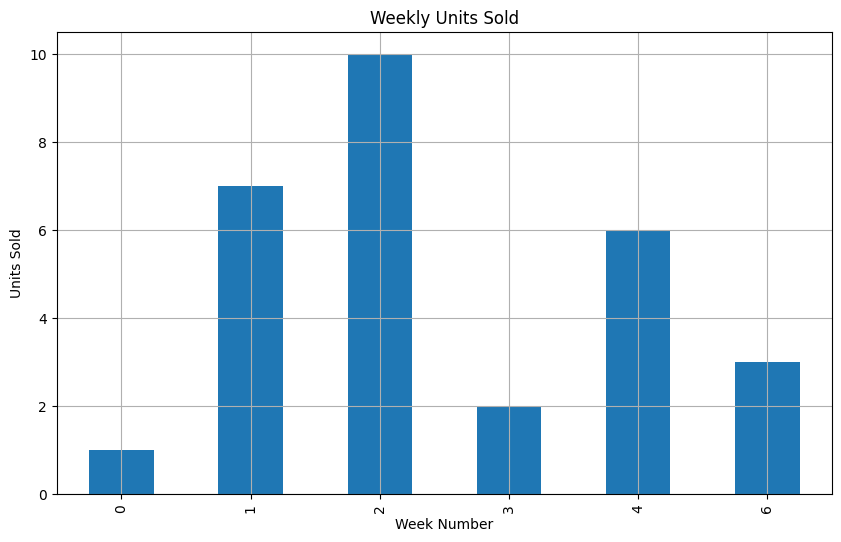

In [1130]:
import pandas as pd
import matplotlib.pyplot as plt

# 依據周分組並計算每周的總單位
weekly_units = df_final.groupby('weekday')['Units'].sum()

# 繪製圖表
plt.figure(figsize=(10, 6))
weekly_units.plot(kind='bar')
plt.title('Weekly Units Sold')
plt.xlabel('Week Number')
plt.ylabel('Units Sold')
plt.grid(True)
plt.show()


但你會發現如果數據有缺漏，這樣的圖表就會有問題。因此，我們需要填充缺漏的數據。

## 計算每筆交易的銷售額，並將日期字符串轉換為日期類型

In [1112]:

df_final['date'] = pd.to_datetime(df_final['date'])
df_final['Sales'] = df_final['Units'] * df_final['Price']

# # 設置日期為索引
df_final.set_index('date', inplace=True)


## 計算MoM、QoQ、YoY

In [1113]:
# 計算MoM、QoQ、YoY
sales_sum = df_final['Sales'].resample('M').sum()  # 月銷售總額
mom = sales_sum.pct_change() * 100  # MoM 增長率

sales_sum_q = df_final['Sales'].resample('Q').sum()  # 季銷售總額
qoq = sales_sum_q.pct_change() * 100  # QoQ 增長率

sales_sum_y = df_final['Sales'].resample('A').sum()  # 年銷售總額
yoy = sales_sum_y.pct_change() * 100  # YoY 增長率

mom, qoq, yoy

(date
 2019-08-31          NaN
 2019-09-30   -28.062678
 2019-10-31    25.148515
 Freq: ME, Name: Sales, dtype: float64,
 date
 2019-09-30          NaN
 2019-12-31   -47.638774
 Freq: QE-DEC, Name: Sales, dtype: float64,
 date
 2019-12-31   NaN
 Freq: YE-DEC, Name: Sales, dtype: float64)

## 日期表的建立是為了統一不同來源表間合併的依據
很多時候在合併異質來源的表，會遇到資料不完整的狀況，為了進行敘述性統計和視覺化，必須設定一個統一的 join key

In [1114]:
# 日期表
def generate_date_range(freq, start_date=None):
    """
    1.	日：2023-01-01
    2.	週：起始日（週日）
    3.	月：2023-01-01
    4.	季：2023-03-01，2023-06-01，2023-09-01，2023-12-01
    5.	半年：2023-06-01，2023-12-01
    6.	年：2023-01-01
    """
    end_date = datetime.now()

    if start_date is None:
        start_date = "2022-01-01"

    if freq == "Y":
        date_range = pd.date_range(start=start_date, end=end_date, freq="Y")
        
    elif freq == "6M":
        date_range = pd.date_range(
            start=start_date, end=end_date, freq="6M"
        ) + DateOffset(months=5)

    elif freq == "Q":
        date_range = pd.date_range(
            start=start_date, end=end_date, freq="Q"
        ) 
    elif freq == "M":
        date_range = pd.date_range(start=start_date, end=end_date, freq="M")
        
    elif freq == "W":
        date_range = pd.date_range(start=start_date, end=end_date, freq="W")
        # date_range = date_range.strftime("%Y-%m-%d")
    elif freq == "D":
        date_range = pd.date_range(start=start_date, end=end_date, freq="D")
        # date_range = date_range.strftime("%Y-%m-%d")
    else:
        raise ValueError("頻率不支援：{}".format(freq))

    df = pd.DataFrame(date_range, columns=["dt"])
    # if freq == "Y" or freq == "6M" or freq == "3M" or freq == "M":
    #     df["dt"] = df["dt"].astype("str").str[:7] + "-01"
    # elif freq == "W":
    #     df.columns = ["dt"]
    # elif freq == "D":
    #     df["dt"] = df["dt"].astype("str")

    return df




## 範例: 生成起始日為 2019-08-01 的日期表

In [1115]:
df_dt = generate_date_range("D",start_date="2019-08-01"); df_dt

,dt
0,2019-08-01
1,2019-08-02
2,2019-08-03
3,2019-08-04
4,2019-08-05
...,...
1695,2024-03-22
1696,2024-03-23
1697,2024-03-24
1698,2024-03-25


## 附表的index 為 日期格式，為了和主表合併，必須產生共同的 key 做 merge

In [1117]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10 entries, 2019-08-01 to 2019-10-30
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     10 non-null     datetime64[ns]
 1   Company  10 non-null     object        
 2   Product  10 non-null     object        
 3   Units    10 non-null     int64         
 4   Price    10 non-null     int64         
 5   yyyy     10 non-null     int32         
 6   Quarter  10 non-null     int32         
 7   mm       10 non-null     int32         
 8   ww       10 non-null     object        
 9   ww_mon   10 non-null     object        
 10  dd       10 non-null     int32         
 11  weekday  10 non-null     int32         
 12  ww_sun   10 non-null     object        
 13  Sales    10 non-null     int64         
dtypes: datetime64[ns](1), int32(5), int64(3), object(5)
memory usage: 1000.0+ bytes


In [1118]:
df_final = df_final.reset_index(); df_final

,date,Date,Company,Product,Units,Price,yyyy,Quarter,mm,ww,ww_mon,dd,weekday,ww_sun,Sales
0,2019-08-01,2019-08-01 08:00:00,Apple,iPhone,1,20000,2019,3,8,30,30,1,3,30,20000
1,2019-08-15,2019-08-15 12:00:00,Microsoft,XBox,1,10000,2019,3,8,32,32,15,3,32,10000
2,2019-08-30,2019-08-30 20:00:00,Amazon,Mop,2,100,2019,3,8,34,34,30,4,34,200
3,2019-08-30,2019-08-30 20:00:00,Microsoft,XBox,4,10000,2019,3,8,34,34,30,4,34,40000
4,2019-09-01,2019-09-01 08:01:00,Apple,iPad,2,5000,2019,3,9,35,34,1,6,34,10000
5,2019-09-15,2019-09-15 12:01:00,Microsoft,Surface,1,40000,2019,3,9,37,36,15,6,36,40000
6,2019-09-30,2019-09-30 20:01:00,Amazon,Decoration,1,500,2019,3,9,39,39,30,0,38,500
7,2019-10-01,2019-10-01 08:02:00,Apple,MacPro,1,60000,2019,4,10,39,39,1,1,39,60000
8,2019-10-15,2019-10-15 12:02:00,Microsoft,Office365,6,500,2019,4,10,41,41,15,1,41,3000
9,2019-10-30,2019-10-30 20:02:00,Amazon,Pen,10,20,2019,4,10,43,43,30,2,43,200


## 日期表與所需要的附表進行合併

In [1119]:
df_merge = pd.merge(df_dt, df_final, left_on='dt', right_on='date', how='left')
df_merge = df_merge.set_index('dt')

In [1120]:
df_merge.head(40)

,date,Date,Company,Product,Units,Price,yyyy,Quarter,mm,ww,ww_mon,dd,weekday,ww_sun,Sales
dt,,,,,,,,,,,,,,,
2019-08-01,2019-08-01,2019-08-01 08:00:00,Apple,iPhone,1.0,20000.0,2019.0,3.0,8.0,30,30,1.0,3.0,30,20000.0
2019-08-02,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-03,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-04,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-05,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-06,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-07,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-08,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-09,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 比較合併前和合併後(加入日期表)的數據，在圖形的呈現上有什麼不同？

### 合併前

In [1121]:
df_final

,date,Date,Company,Product,Units,Price,yyyy,Quarter,mm,ww,ww_mon,dd,weekday,ww_sun,Sales
0,2019-08-01,2019-08-01 08:00:00,Apple,iPhone,1,20000,2019,3,8,30,30,1,3,30,20000
1,2019-08-15,2019-08-15 12:00:00,Microsoft,XBox,1,10000,2019,3,8,32,32,15,3,32,10000
2,2019-08-30,2019-08-30 20:00:00,Amazon,Mop,2,100,2019,3,8,34,34,30,4,34,200
3,2019-08-30,2019-08-30 20:00:00,Microsoft,XBox,4,10000,2019,3,8,34,34,30,4,34,40000
4,2019-09-01,2019-09-01 08:01:00,Apple,iPad,2,5000,2019,3,9,35,34,1,6,34,10000
5,2019-09-15,2019-09-15 12:01:00,Microsoft,Surface,1,40000,2019,3,9,37,36,15,6,36,40000
6,2019-09-30,2019-09-30 20:01:00,Amazon,Decoration,1,500,2019,3,9,39,39,30,0,38,500
7,2019-10-01,2019-10-01 08:02:00,Apple,MacPro,1,60000,2019,4,10,39,39,1,1,39,60000
8,2019-10-15,2019-10-15 12:02:00,Microsoft,Office365,6,500,2019,4,10,41,41,15,1,41,3000
9,2019-10-30,2019-10-30 20:02:00,Amazon,Pen,10,20,2019,4,10,43,43,30,2,43,200


In [1122]:
df_final

,date,Date,Company,Product,Units,Price,yyyy,Quarter,mm,ww,ww_mon,dd,weekday,ww_sun,Sales
0,2019-08-01,2019-08-01 08:00:00,Apple,iPhone,1,20000,2019,3,8,30,30,1,3,30,20000
1,2019-08-15,2019-08-15 12:00:00,Microsoft,XBox,1,10000,2019,3,8,32,32,15,3,32,10000
2,2019-08-30,2019-08-30 20:00:00,Amazon,Mop,2,100,2019,3,8,34,34,30,4,34,200
3,2019-08-30,2019-08-30 20:00:00,Microsoft,XBox,4,10000,2019,3,8,34,34,30,4,34,40000
4,2019-09-01,2019-09-01 08:01:00,Apple,iPad,2,5000,2019,3,9,35,34,1,6,34,10000
5,2019-09-15,2019-09-15 12:01:00,Microsoft,Surface,1,40000,2019,3,9,37,36,15,6,36,40000
6,2019-09-30,2019-09-30 20:01:00,Amazon,Decoration,1,500,2019,3,9,39,39,30,0,38,500
7,2019-10-01,2019-10-01 08:02:00,Apple,MacPro,1,60000,2019,4,10,39,39,1,1,39,60000
8,2019-10-15,2019-10-15 12:02:00,Microsoft,Office365,6,500,2019,4,10,41,41,15,1,41,3000
9,2019-10-30,2019-10-30 20:02:00,Amazon,Pen,10,20,2019,4,10,43,43,30,2,43,200


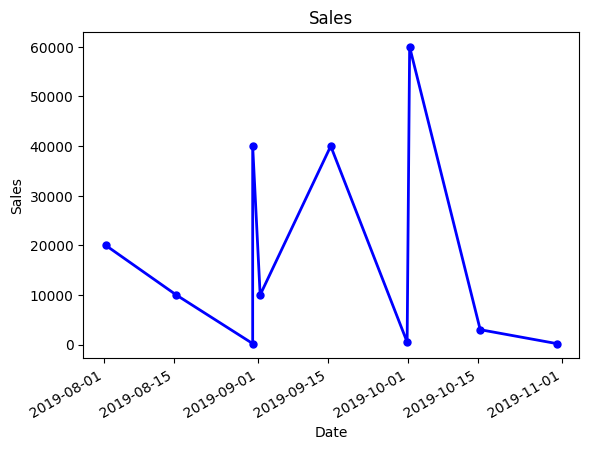

In [1123]:
df_final
df_final.set_index('Date', inplace=True)

# plot style
df_final.loc[:,'Sales'].plot(title='Sales', style='b.-', linewidth=2, markersize=10)
plt.ylabel('Sales')
plt.show()


### 合併後

In [1124]:
df_merge.head()

,date,Date,Company,Product,Units,Price,yyyy,Quarter,mm,ww,ww_mon,dd,weekday,ww_sun,Sales
dt,,,,,,,,,,,,,,,
2019-08-01,2019-08-01,2019-08-01 08:00:00,Apple,iPhone,1.0,20000.0,2019.0,3.0,8.0,30,30,1.0,3.0,30,20000.0
2019-08-02,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-03,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-04,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-05,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


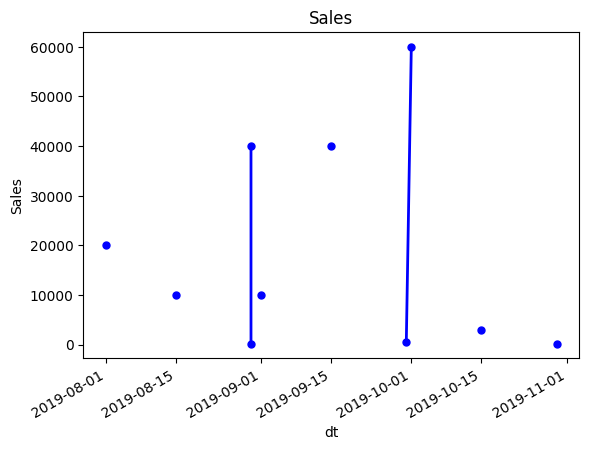

In [1125]:
# plot style
df_merge.loc[:,'Sales'].plot(title='Sales', style='b.-', linewidth=2, markersize=10)
plt.ylabel('Sales')
plt.show()


In [1127]:
mom

date
2019-08-31          NaN
2019-09-30   -28.062678
2019-10-31    25.148515
Freq: ME, Name: Sales, dtype: float64

In [1135]:
import pandas as pd

# 創建數據
data = {
    'Date': ['2019-08-01', '2019-08-01', '2019-08-02', '2019-08-02'],
    'Company': ['Apple', 'Microsoft', 'Apple', 'Microsoft'],
    'Product': ['iPhone', 'Xbox', 'iPad', 'Surface'],
    'Units': [10, 5, 7, 3]
}

# 將數據加載到DataFrame
df = pd.DataFrame(data)

# 創建樞紐分析表，展示每個公司的產品銷售總和
pivot_table = df.pivot_table(index='Company', columns='Product', values='Units', aggfunc='sum', fill_value=0)

print(pivot_table)


Product    Surface  Xbox  iPad  iPhone
Company                               
Apple            0     0     7      10
Microsoft        3     5     0       0


In [1136]:
df

,Date,Company,Product,Units
0,2019-08-01,Apple,iPhone,10
1,2019-08-01,Microsoft,Xbox,5
2,2019-08-02,Apple,iPad,7
3,2019-08-02,Microsoft,Surface,3
